In [52]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A Gallup survey found that 65% of all financial consumers were very satisfied with
their primary financial institution. Suppose that 25 financial consumers are sampled
and if the Gallup survey result still holds true today, what is the probability that
exactly 19 are very satisfied with their primary financial institution?

In [13]:
# P(x = 19)
x = stats.binom.pmf(k=19,n=25,p=0.65)
x = round(x,4)
print(f"probability that exactly 19 are very satisfied with their primary financial institution {x}")

probability that exactly 19 are very satisfied with their primary financial institution 0.0908


According to the U.S. Census Bureau, approximately 6% of all workers in Jackson,
Mississippi, are unemployed. In conducting a random telephone survey in Jackson,
what is the probability of getting two or fewer unemployed workers in a sample of 20?

In [17]:
# P(x <= 2)
x = stats.binom.cdf(k=2,n=20,p=0.06)
x = round(x,4)
print(f"Probability of getting two or fewer unemployed workers {x}")

Probability of getting two or fewer unemployed workers 0.885


According to one study, 64% of all financial consumers believe banks are more competitive
today than they were five years ago. If 23 financial consumers are selected randomly,
what is the expected number who believe banks are more competitive today than
they were five years ago?

In [25]:
X = stats.binom(n=23, p=0.64) 
x = X.mean()
x = round(x,4)
print(f"expected number who believe banks are more competitive today than they were five years ago {x}")
x = X.std()
x = round(x,4)
print(f"with standard deviation of {x}")

expected number who believe banks are more competitive today than they were five years ago 14.72
with standard deviation of 2.302


Improve the ROI (Return on Investment) of company’s call center, where employees attempt to cold call potential customers and get them to purchase our product.

You look at some historical data and find the following:

* The typical call center employee completes on average 50 calls per day.
* The probability of a conversion (purchase) for each call is 4%.
* The average revenue to your company for each conversion is 20 dollar.
* The call center you are analyzing has 100 employees.
* Each employee is paid $200 per day of work.

In [28]:
# Call Center Simulation

# Number of employees to simulate
employees = 100

# Cost per employee
wage = 200

# Number of independent calls per employee
n = 50

# Probability of success for each call
p = 0.04

# Revenue per call
revenue = 100

# Binomial random variables of call center employees
conversions = np.random.binomial(n, p, size=employees)


# Print some key metrics of our call center
print('Average Conversions per Employee: ' + str(round(np.mean(conversions), 2)))
print('Standard Deviation of Conversions per Employee: ' + str(round(np.std(conversions), 2)))
print('Total Conversions: ' + str(np.sum(conversions)))
print('Total Revenues: ' + str(np.sum(conversions)*revenue))
print('Total Expense: ' + str(employees*wage))
print('Total Profits: ' + str(np.sum(conversions)*revenue - employees*wage))

Average Conversions per Employee: 2.14
Standard Deviation of Conversions per Employee: 1.35
Total Conversions: 214
Total Revenues: 21400
Total Expense: 20000
Total Profits: 1400


Profits are pretty slim compared to expenses. But these are results for just one randomly generated day. Let’s look at the profit of our call center over 1,000 simulations and see how the daily profit varies

Text(0, 0.5, 'Frequency')

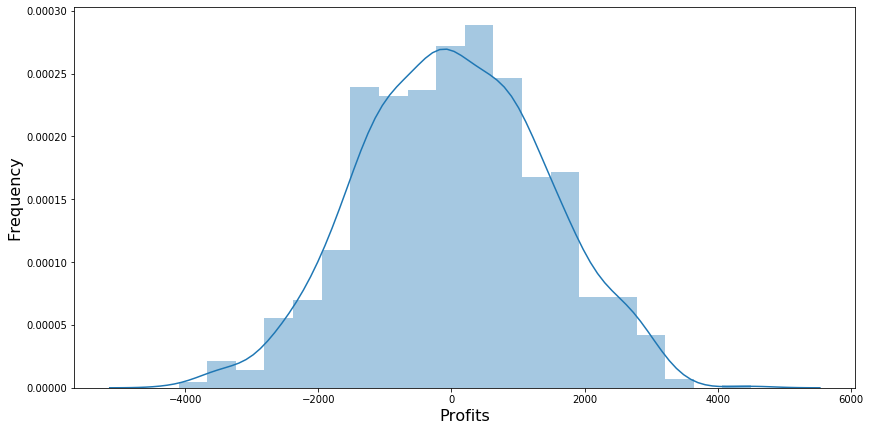

In [53]:
# Simulate 1,000 days for our call center

# Number of days to simulate
sims = 1000

sim_conversions = [np.sum(np.random.binomial(n, p, size=employees)) for i in range(sims)]
sim_profits = np.array(sim_conversions)*revenue - employees*wage

# Plot and save the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sim_profits, bins=20, label='simulation results')

ax.set_xlabel("Profits",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)

Wow, there is a very high chance of loss given the current operating metrics of our call center (nearly half the simulated profits are negative). What should we do then?
* Make more cold calls (increase n).
* Convert at a higher percentage (increase p).
* Pay our employees less (we won’t do this because we are nice).

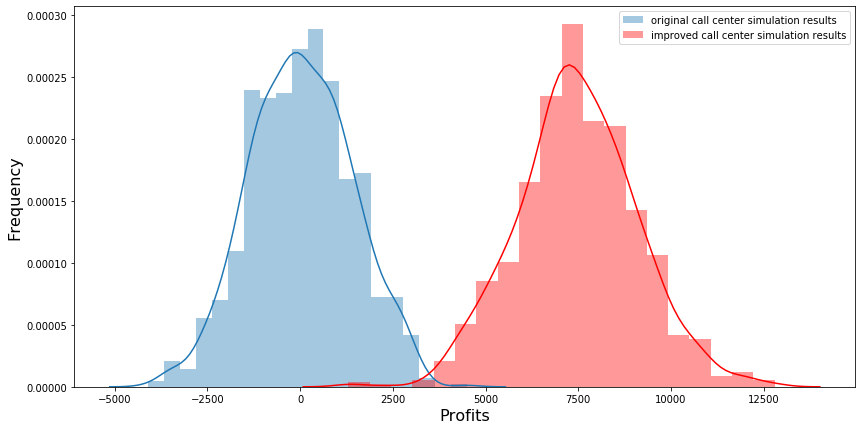

In [56]:
# Simulate 1,000 days for our call center

# Call Center Simulation (Higher Conversion Rate)

# Number of employees to simulate
employees = 100

# Cost per employee
wage = 200

# Number of independent calls per employee
n = 55

# Probability of success for each call
p = 0.05

# Revenue per call
revenue = 100
# Binomial random variables of call center employees
conversions_up = np.random.binomial(n, p, size=employees)

# Simulate 1,000 days for our call center
# Number of days to simulate
sims = 1000

sim_conversions_up = [np.sum(np.random.binomial(n, p, size=employees)) for i in range(sims)]
sim_profits_up = np.array(sim_conversions_up)*revenue - employees*wage

# Plot and save the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sim_profits, bins=20, label='original call center simulation results')
ax = sns.distplot(sim_profits_up, bins=20, label='improved call center simulation results', color='red')

ax.set_xlabel("Profits",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()


if we could increase both the n (number of cold calls made per day) and p (probability of conversion for each call) parameters, we could generate higher profits.

